In [1]:
import pandas as pd
import gcsfs

In [2]:
df_train = pd.read_csv('gs://dataproc-e3bd1f7b-2e29-4da6-a5c4-077c164fd32a-us-central1/avito/test/train.csv', parse_dates=["activation_date"])
df_train.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


In [3]:
df_test = pd.read_csv('gs://dataproc-e3bd1f7b-2e29-4da6-a5c4-077c164fd32a-us-central1/avito/test/test.csv', parse_dates=["activation_date"])
df_test.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1
0,6544e41a8817,dbe73ad6e4b5,Волгоградская область,Волгоград,Личные вещи,Детская одежда и обувь,Для мальчиков,Обувь,25,Отдам бесплатно,На ангарском,NaN,66,2017-04-18,Private,a8b57acb5ab304f9c331ac7a074219aed4d349d8aef386...,2020.0
1,65b9484d670f,2e11806abe57,Свердловская область,Нижняя Тура,Хобби и отдых,Велосипеды,Дорожные,NaN,NaN,Продам велосипед,"Продам велосипед KAMA F200,в нормальном состо...",3000.0,4,2017-04-16,Private,NaN,NaN
2,8bab230b2ecd,0b850bbebb10,Новосибирская область,Бердск,Бытовая электроника,Аудио и видео,Телевизоры и проекторы,NaN,NaN,BBK,Продам новый телевизор BBK 32 диагональ смарт...,15000.0,15,2017-04-17,Private,8c361112cb049745ef2d1b0ae73594fc5c107286b0c942...,2960.0
3,8e348601fefc,5f1d5c3ce0da,Саратовская область,Саратов,Для дома и дачи,Бытовая техника,Для кухни,Вытяжки,NaN,Вытяжка Jetair 60,"Продам новую вытяжку в упаковке,с документами....",4500.0,70,2017-04-17,Private,NaN,NaN
4,8bd2fe400b89,23e2d97bfc7f,Оренбургская область,Бузулук,Личные вещи,Товары для детей и игрушки,Детские коляски,NaN,NaN,Коляска зима-лето,Продам отличную коляску. б/у 1 год. все вопрос...,4900.0,15,2017-04-15,Private,bc3cf6deef10840fc302e38eb48fa7748aa1e28d534f8f...,1002.0


In [4]:
df_test_periods = pd.read_csv('gs://dataproc-e3bd1f7b-2e29-4da6-a5c4-077c164fd32a-us-central1/avito/test/periods_test.csv',parse_dates=["activation_date", "date_from", "date_to"])
df_test_periods.head()

,item_id,activation_date,date_from,date_to
0,f3a62a713278,2017-03-13,2017-04-12,2017-04-12
1,045ec5dabe07,2017-04-03,2017-04-12,2017-04-18
2,801d15e12e25,2017-04-17,2017-04-17,2017-04-18
3,0a981789d4af,2017-03-23,2017-04-12,2017-04-18
4,cab2ed403350,2017-03-28,2017-04-12,2017-04-18


In [5]:
df_train_periods = pd.read_csv('gs://dataproc-e3bd1f7b-2e29-4da6-a5c4-077c164fd32a-us-central1/avito/test/periods_train.csv',parse_dates=["activation_date", "date_from", "date_to"])
df_train_periods.head()

,item_id,activation_date,date_from,date_to
0,8f5caef7afb0,2017-02-14,2017-03-15,2017-03-16
1,66218ff526d1,2017-02-16,2017-03-15,2017-03-18
2,b237d9539b21,2017-03-01,2017-03-15,2017-03-28
3,80bf58082ad3,2017-03-19,2017-03-19,2017-03-28
4,67a9944a7373,2017-03-14,2017-03-15,2017-03-28


In [7]:
df_train.shape


(1503424, 18)

In [8]:
df_test.shape

(508438, 17)

In [9]:
df_train_periods.shape

(16687412, 4)

In [10]:
df_test_periods.shape

(13724922, 4)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503424 entries, 0 to 1503423
Data columns (total 18 columns):
item_id                 1503424 non-null object
user_id                 1503424 non-null object
region                  1503424 non-null object
city                    1503424 non-null object
parent_category_name    1503424 non-null object
category_name           1503424 non-null object
param_1                 1441848 non-null object
param_2                 848882 non-null object
param_3                 640859 non-null object
title                   1503424 non-null object
description             1387148 non-null object
price                   1418062 non-null float64
item_seq_number         1503424 non-null int64
activation_date         1503424 non-null datetime64[ns]
user_type               1503424 non-null object
image                   1390836 non-null object
image_top_1             1390836 non-null float64
deal_probability        1503424 non-null float64
dtypes: datetim

In [12]:
df_train['weekday'] = df_train.activation_date.dt.weekday
df_train['month'] = df_train.activation_date.dt.month
df_train['day'] = df_train.activation_date.dt.day
df_train['week'] = df_train.activation_date.dt.week 

In [13]:
df_train.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,...,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability,weekday,month,day,week
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),...,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789,1,3,28,13
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,...,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000,6,3,26,12
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,...,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177,0,3,20,12
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,...,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323,5,3,25,12
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",...,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797,3,3,16,11


In [14]:
df_train['description'] = df_train['description'].fillna(" ")
df_train['description_len'] = df_train['description'].apply(lambda x : len(x.split()))

df_train['title'] = df_train['title'].fillna(" ")
df_train['title_len'] = df_train['title'].apply(lambda x : len(x.split()))

In [15]:
df_train.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,...,user_type,image,image_top_1,deal_probability,weekday,month,day,week,description_len,title_len
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),...,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789,1,3,28,13,7,3
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,...,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000,6,3,26,12,7,3
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,...,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177,0,3,20,12,17,2
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,...,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323,5,3,25,12,3,1
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",...,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797,3,3,16,11,4,3


In [16]:
df_train['param_1'] = df_train['param_1'].fillna(" ")
df_train['param_2'] = df_train['param_2'].fillna(" ")
df_train['param_3'] = df_train['param_3'].fillna(" ")

In [17]:
df_train['param_combined'] = df_train.apply(lambda row: ' '.join([str(row['param_1']), str(row['param_2']),  str(row['param_3'])]), axis=1)
df_train['param_combined'] = df_train['param_combined'].fillna(" ")
df_train['param_combined_len'] = df_train['param_combined'].apply(lambda x : len(x.split()))

In [18]:
df_train.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,...,image_top_1,deal_probability,weekday,month,day,week,description_len,title_len,param_combined,param_combined_len
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,,,Кокоби(кокон для сна),...,1008.0,0.12789,1,3,28,13,7,3,Постельные принадлежности,2
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,,,Стойка для Одежды,...,692.0,0.00000,6,3,26,12,7,3,Другое,1
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",,,Philips bluray,...,3032.0,0.43177,0,3,20,12,17,2,"Видео, DVD и Blu-ray плееры",5
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,,,Автокресло,...,796.0,0.80323,5,3,25,12,3,1,Автомобильные кресла,2
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",...,2264.0,0.20797,3,3,16,11,4,3,С пробегом ВАЗ (LADA) 2110,5


In [19]:
df_train_active = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('gs://dataproc-e3bd1f7b-2e29-4da6-a5c4-077c164fd32a-us-central1/avito/test/train_active.csv')

NameError: name 'sqlContext' is not defined

In [20]:
parent_category_name_map = {"Личные вещи" : "Personal belongings",
                            "Для дома и дачи" : "For the home and garden",
                            "Бытовая электроника" : "Consumer electronics",
                            "Недвижимость" : "Real estate",
                            "Хобби и отдых" : "Hobbies & leisure",
                            "Транспорт" : "Transport",
                            "Услуги" : "Services",
                            "Животные" : "Animals",
                            "Для бизнеса" : "For business"}

region_map = {"Свердловская область" : "Sverdlovsk oblast",
            "Самарская область" : "Samara oblast",
            "Ростовская область" : "Rostov oblast",
            "Татарстан" : "Tatarstan",
            "Волгоградская область" : "Volgograd oblast",
            "Нижегородская область" : "Nizhny Novgorod oblast",
            "Пермский край" : "Perm Krai",
            "Оренбургская область" : "Orenburg oblast",
            "Ханты-Мансийский АО" : "Khanty-Mansi Autonomous Okrug",
            "Тюменская область" : "Tyumen oblast",
            "Башкортостан" : "Bashkortostan",
            "Краснодарский край" : "Krasnodar Krai",
            "Новосибирская область" : "Novosibirsk oblast",
            "Омская область" : "Omsk oblast",
            "Белгородская область" : "Belgorod oblast",
            "Челябинская область" : "Chelyabinsk oblast",
            "Воронежская область" : "Voronezh oblast",
            "Кемеровская область" : "Kemerovo oblast",
            "Саратовская область" : "Saratov oblast",
            "Владимирская область" : "Vladimir oblast",
            "Калининградская область" : "Kaliningrad oblast",
            "Красноярский край" : "Krasnoyarsk Krai",
            "Ярославская область" : "Yaroslavl oblast",
            "Удмуртия" : "Udmurtia",
            "Алтайский край" : "Altai Krai",
            "Иркутская область" : "Irkutsk oblast",
            "Ставропольский край" : "Stavropol Krai",
            "Тульская область" : "Tula oblast"}


category_map = {"Одежда, обувь, аксессуары":"Clothing, shoes, accessories",
"Детская одежда и обувь":"Children's clothing and shoes",
"Товары для детей и игрушки":"Children's products and toys",
"Квартиры":"Apartments",
"Телефоны":"Phones",
"Мебель и интерьер":"Furniture and interior",
"Предложение услуг":"Offer services",
"Автомобили":"Cars",
"Ремонт и строительство":"Repair and construction",
"Бытовая техника":"Appliances",
"Товары для компьютера":"Products for computer",
"Дома, дачи, коттеджи":"Houses, villas, cottages",
"Красота и здоровье":"Health and beauty",
"Аудио и видео":"Audio and video",
"Спорт и отдых":"Sports and recreation",
"Коллекционирование":"Collecting",
"Оборудование для бизнеса":"Equipment for business",
"Земельные участки":"Land",
"Часы и украшения":"Watches and jewelry",
"Книги и журналы":"Books and magazines",
"Собаки":"Dogs",
"Игры, приставки и программы":"Games, consoles and software",
"Другие животные":"Other animals",
"Велосипеды":"Bikes",
"Ноутбуки":"Laptops",
"Кошки":"Cats",
"Грузовики и спецтехника":"Trucks and buses",
"Посуда и товары для кухни":"Tableware and goods for kitchen",
"Растения":"Plants",
"Планшеты и электронные книги":"Tablets and e-books",
"Товары для животных":"Pet products",
"Комнаты":"Room",
"Фототехника":"Photo",
"Коммерческая недвижимость":"Commercial property",
"Гаражи и машиноместа":"Garages and Parking spaces",
"Музыкальные инструменты":"Musical instruments",
"Оргтехника и расходники":"Office equipment and consumables",
"Птицы":"Birds",
"Продукты питания":"Food",
"Мотоциклы и мототехника":"Motorcycles and bikes",
"Настольные компьютеры":"Desktop computers",
"Аквариум":"Aquarium",
"Охота и рыбалка":"Hunting and fishing",
"Билеты и путешествия":"Tickets and travel",
"Водный транспорт":"Water transport",
"Готовый бизнес":"Ready business",
"Недвижимость за рубежом":"Property abroad"}

In [21]:
df_train['region_en'] = df_train['region'].apply(lambda x : region_map[x])
df_train['parent_category_name_en'] = df_train['parent_category_name'].apply(lambda x : parent_category_name_map[x])
df_train['category_name_en'] = df_train['category_name'].apply(lambda x : category_map[x])

In [22]:
df_train.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,...,month,day,week,description_len,title_len,param_combined,param_combined_len,region_en,parent_category_name_en,category_name_en
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,,,Кокоби(кокон для сна),...,3,28,13,7,3,Постельные принадлежности,2,Sverdlovsk oblast,Personal belongings,Children's products and toys
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,,,Стойка для Одежды,...,3,26,12,7,3,Другое,1,Samara oblast,For the home and garden,Furniture and interior
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",,,Philips bluray,...,3,20,12,17,2,"Видео, DVD и Blu-ray плееры",5,Rostov oblast,Consumer electronics,Audio and video
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,,,Автокресло,...,3,25,12,3,1,Автомобильные кресла,2,Tatarstan,Personal belongings,Children's products and toys
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",...,3,16,11,4,3,С пробегом ВАЗ (LADA) 2110,5,Volgograd oblast,Transport,Cars


In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503424 entries, 0 to 1503423
Data columns (total 29 columns):
item_id                    1503424 non-null object
user_id                    1503424 non-null object
region                     1503424 non-null object
city                       1503424 non-null object
parent_category_name       1503424 non-null object
category_name              1503424 non-null object
param_1                    1503424 non-null object
param_2                    1503424 non-null object
param_3                    1503424 non-null object
title                      1503424 non-null object
description                1503424 non-null object
price                      1418062 non-null float64
item_seq_number            1503424 non-null int64
activation_date            1503424 non-null datetime64[ns]
user_type                  1503424 non-null object
image                      1390836 non-null object
image_top_1                1390836 non-null float64
deal_probab

In [24]:
df_train['price'] = df_train['price'].fillna("0")

In [25]:
df_train['price']

0            400
1           3000
2           4000
3           2200
4          40000
           ...  
1503419      300
1503420      200
1503421        0
1503422      350
1503423     1500
Name: price, Length: 1503424, dtype: object

In [26]:
df_train['image_top_1']

0          1008.0
1           692.0
2          3032.0
3           796.0
4          2264.0
            ...  
1503419      88.0
1503420    1191.0
1503421    1202.0
1503422      87.0
1503423     979.0
Name: image_top_1, Length: 1503424, dtype: float64

In [27]:
df_train_periods['total_period'] = df_train_periods['date_to'] - df_train_periods['date_from']

In [28]:
df_train_periods.head()

,item_id,activation_date,date_from,date_to,total_period
0,8f5caef7afb0,2017-02-14,2017-03-15,2017-03-16,1 days
1,66218ff526d1,2017-02-16,2017-03-15,2017-03-18,3 days
2,b237d9539b21,2017-03-01,2017-03-15,2017-03-28,13 days
3,80bf58082ad3,2017-03-19,2017-03-19,2017-03-28,9 days
4,67a9944a7373,2017-03-14,2017-03-15,2017-03-28,13 days


In [29]:
daymap = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}
df_train['weekday_en'] = df_train['weekday'].apply(lambda x : daymap[x])

In [30]:
df_train.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,...,day,week,description_len,title_len,param_combined,param_combined_len,region_en,parent_category_name_en,category_name_en,weekday_en
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,,,Кокоби(кокон для сна),...,28,13,7,3,Постельные принадлежности,2,Sverdlovsk oblast,Personal belongings,Children's products and toys,Mon
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,,,Стойка для Одежды,...,26,12,7,3,Другое,1,Samara oblast,For the home and garden,Furniture and interior,Sat
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",,,Philips bluray,...,20,12,17,2,"Видео, DVD и Blu-ray плееры",5,Rostov oblast,Consumer electronics,Audio and video,Sun
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,,,Автокресло,...,25,12,3,1,Автомобильные кресла,2,Tatarstan,Personal belongings,Children's products and toys,Fri
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",...,16,11,4,3,С пробегом ВАЗ (LADA) 2110,5,Volgograd oblast,Transport,Cars,Wed


In [31]:
interval = (-0.99, .10, .20, .30, .40, .50, .60, .70, .80, .90, 1.1)
cats = ['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9','0.9-1.0']
df_train['deal_class'] = df_train['deal_probability'].apply(lambda x: ">=0.5" if x >=0.5 else "<0.5")
df_train["deal_class_2"] = pd.cut(df_train.deal_probability, interval, labels=cats)

In [32]:
df_train.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,...,description_len,title_len,param_combined,param_combined_len,region_en,parent_category_name_en,category_name_en,weekday_en,deal_class,deal_class_2
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,,,Кокоби(кокон для сна),...,7,3,Постельные принадлежности,2,Sverdlovsk oblast,Personal belongings,Children's products and toys,Mon,<0.5,0.1-0.2
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,,,Стойка для Одежды,...,7,3,Другое,1,Samara oblast,For the home and garden,Furniture and interior,Sat,<0.5,0-0.1
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",,,Philips bluray,...,17,2,"Видео, DVD и Blu-ray плееры",5,Rostov oblast,Consumer electronics,Audio and video,Sun,<0.5,0.4-0.5
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,,,Автокресло,...,3,1,Автомобильные кресла,2,Tatarstan,Personal belongings,Children's products and toys,Fri,>=0.5,0.8-0.9
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",...,4,3,С пробегом ВАЗ (LADA) 2110,5,Volgograd oblast,Transport,Cars,Wed,<0.5,0.2-0.3


In [33]:
interval = (-0.99, .20, .40, .60, .70, .80, .90, 1.1)
cats = [ 'Too Bad', 'Bad', 'Can do Better', 'Not Bad', 'Good', 'Great', 'Perfect']
df_train["deal_class_3"] = pd.cut(df_train.deal_probability, interval, labels=cats)

In [34]:
df_train.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,...,title_len,param_combined,param_combined_len,region_en,parent_category_name_en,category_name_en,weekday_en,deal_class,deal_class_2,deal_class_3
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,,,Кокоби(кокон для сна),...,3,Постельные принадлежности,2,Sverdlovsk oblast,Personal belongings,Children's products and toys,Mon,<0.5,0.1-0.2,Too Bad
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,,,Стойка для Одежды,...,3,Другое,1,Samara oblast,For the home and garden,Furniture and interior,Sat,<0.5,0-0.1,Too Bad
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",,,Philips bluray,...,2,"Видео, DVD и Blu-ray плееры",5,Rostov oblast,Consumer electronics,Audio and video,Sun,<0.5,0.4-0.5,Can do Better
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,,,Автокресло,...,1,Автомобильные кресла,2,Tatarstan,Personal belongings,Children's products and toys,Fri,>=0.5,0.8-0.9,Great
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",...,3,С пробегом ВАЗ (LADA) 2110,5,Volgograd oblast,Transport,Cars,Wed,<0.5,0.2-0.3,Bad


In [35]:
df_train.deal_class_3.value_counts()

Too Bad          1180905
Bad               124839
Great              84022
Good               68946
Can do Better      29054
Perfect            10076
Not Bad             5582
Name: deal_class_3, dtype: int64

In [36]:
df_train.deal_class_3.value_counts().plot(kind='bar')

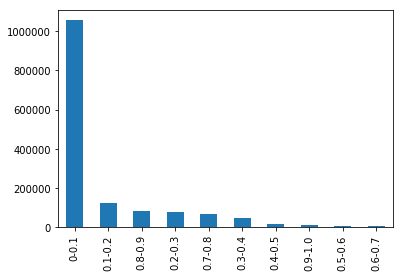

In [37]:
df_train.deal_class_2.value_counts().plot(kind='bar')

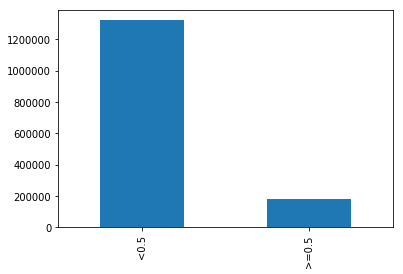

In [38]:
df_train.deal_class.value_counts().plot(kind='bar')

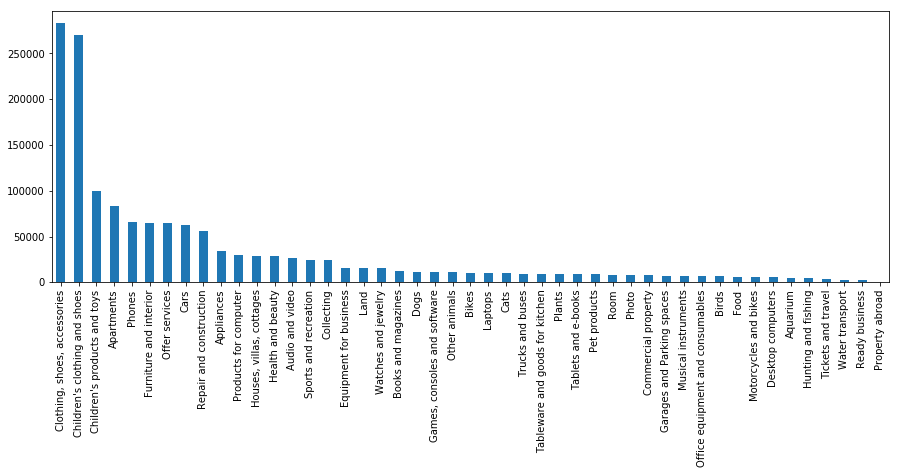

In [39]:
df_train.category_name_en.value_counts().plot(kind='bar',figsize = (15,5))

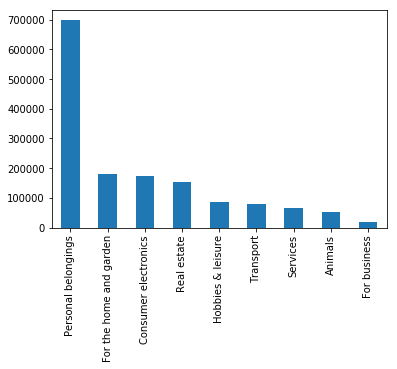

In [40]:
df_train.parent_category_name_en.value_counts().plot(kind='bar')

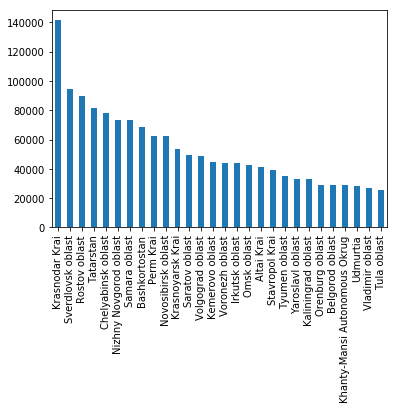

In [41]:
df_train.region_en.value_counts().plot(kind='bar')

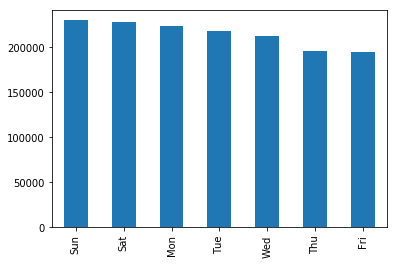

In [42]:
df_train.weekday_en.value_counts().plot(kind='bar')

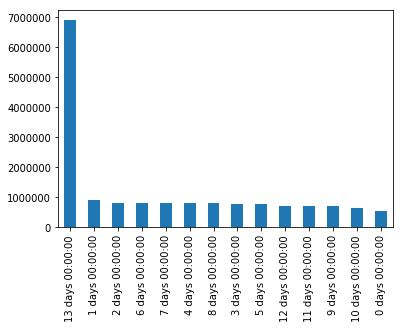

In [43]:
df_train_periods.total_period.value_counts().plot(kind='bar')

In [44]:
df_train_periods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16687412 entries, 0 to 16687411
Data columns (total 5 columns):
item_id            object
activation_date    datetime64[ns]
date_from          datetime64[ns]
date_to            datetime64[ns]
total_period       timedelta64[ns]
dtypes: datetime64[ns](3), object(1), timedelta64[ns](1)
memory usage: 636.6+ MB


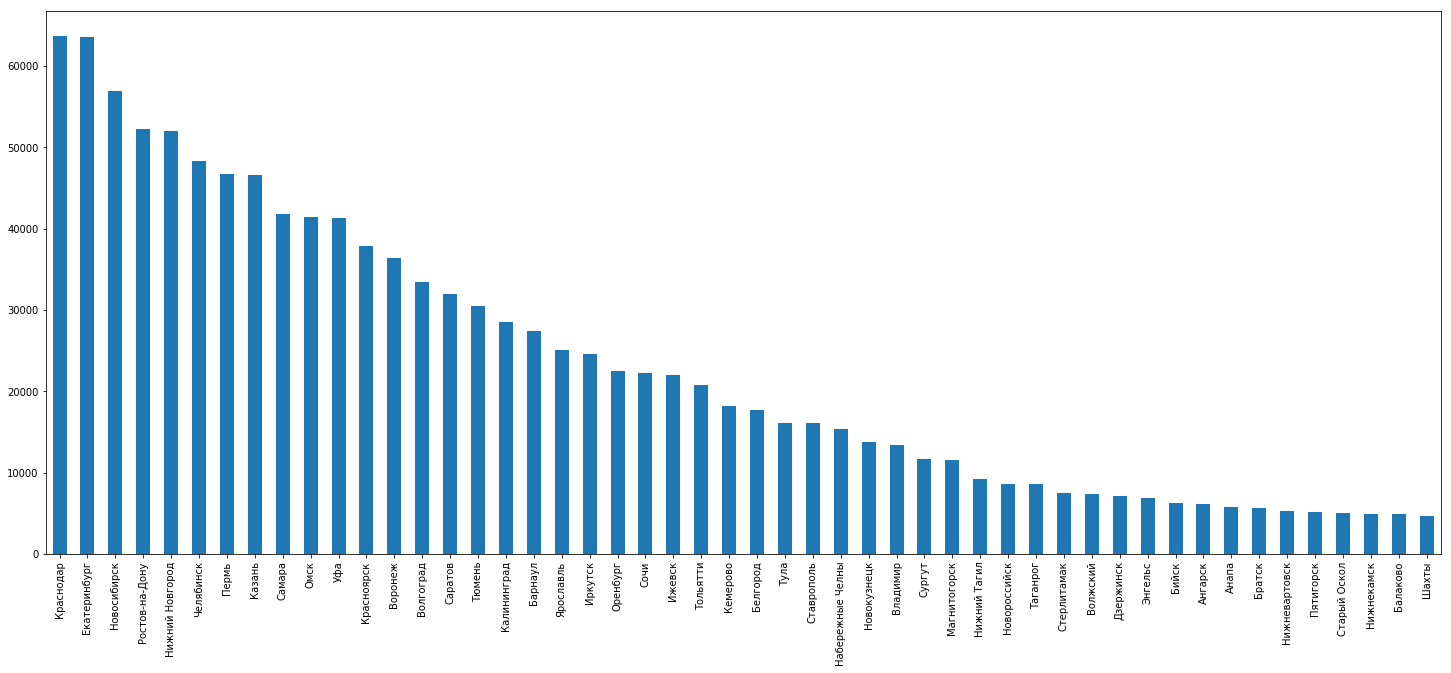

In [45]:
df_train.city.value_counts().head(50).plot(kind='bar',figsize = (25,10))